In [150]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [175]:
data = yf.download('SBUX', start='2019-01-01', end='2020-12-31')
S0 = data['Adj Close'][-1]
mu = data['Adj Close'].pct_change().mean()
sigma = (0.21 + 0.38)/2
#sigma = 0.21
expiration_date = dt.datetime(2024, 2, 16)
today = dt.datetime(2023, 11, 30)
strike_price = 100
T = (expiration_date - today).days/252
optionPrice = 3.65
multiplier = 100

[*********************100%***********************]  1 of 1 completed


In [163]:
def brownianMotion(S0, mu, sigma, T, dt):
    n = round(T/dt)
    t = np.linspace(0, T, n)
    W = [0] + np.random.standard_normal(size = n)
    W = np.cumsum(W)*np.sqrt(dt)
    X = (mu - (sigma**2)/2)*t + sigma*W
    S = S0*np.exp(X)
    return S

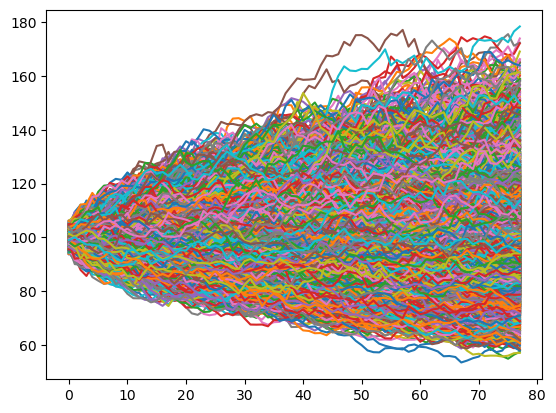

Predicted Ending Price:  100.01997687496471
Probability of Profit at maturity:  0.3053
Expected Profit at maturity:  -1.421309999999998
Expected Max Value:  112.40395686152446
Potential return for exercising early: 875.3956861524457


In [183]:
n = 10000
total = np.zeros(n)
max = np.zeros(n)
for i in range(n):
    BM = brownianMotion(S0, mu, sigma, T, 1/252)
    plt.plot(BM)
    total[i] = BM[-1]
    max[i] = np.max(BM)
plt.show()
predPrice = np.average(total)
print("Predicted Ending Price: ", predPrice)
m = optionPrice + strike_price
w = strike_price
count = 0
for i in total:
    if i > 2*m - w:
        count += 1
prob = count/n
print("Probability of Profit at maturity: ", prob)
print("Expected Profit at maturity: ", prob*(m - w) - (1 - prob)*optionPrice)
print("Expected Max Value: ", np.average(max))
print("Potential return for exercising early: " + str((np.average(max) - m) * multiplier))